In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib as plt

In [2]:
tickers = ['ITUB','MSFT','ABEV','GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [3]:
#Informação dos resultados, aonde é possivel confirmar que os dados estão limpos e estruturados dentro da carteira de ativos.
#Obs: Números iguais ao lados do ticket me responde que os dados estão tudo ok, ou seja se não estivesse apareceria números diferentes e análise a seguir poderia dar erros.
#Pode acontecer que os erros são referente a ativos mais recentes que não compartilham a mesma quantidade de dados comparados aos outros ativos na carteira.
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5145 entries, 2002-02-25 to 2022-08-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ITUB    5145 non-null   float64
 1   MSFT    5145 non-null   float64
 2   ABEV    5145 non-null   float64
 3   GE      5145 non-null   float64
dtypes: float64(4)
memory usage: 201.0 KB


In [4]:
mydata.head()

,ITUB,MSFT,ABEV,GE
Date,,,,
2002-02-25,0.642817,18.567511,0.280294,170.532822
2002-02-26,0.663664,18.400948,0.280294,168.575150
2002-02-27,0.662902,18.350658,0.280294,169.361923
2002-02-28,0.654520,18.334946,0.280294,168.269241
2002-03-01,0.640043,19.287205,0.280294,172.421310


In [5]:
mydata.tail()

,ITUB,MSFT,ABEV,GE
Date,,,,
2022-07-26,4.34,251.899994,2.72,71.510002
2022-07-27,4.44,268.739990,2.83,71.580002
2022-07-28,4.56,276.410004,2.88,73.139999
2022-07-29,4.50,280.739990,2.82,73.910004
2022-08-01,4.49,278.010010,2.77,75.800003


In [6]:
mydata.iloc[0]

ITUB      0.642817
MSFT     18.567511
ABEV      0.280294
GE      170.532822
Name: 2002-02-25 00:00:00, dtype: float64

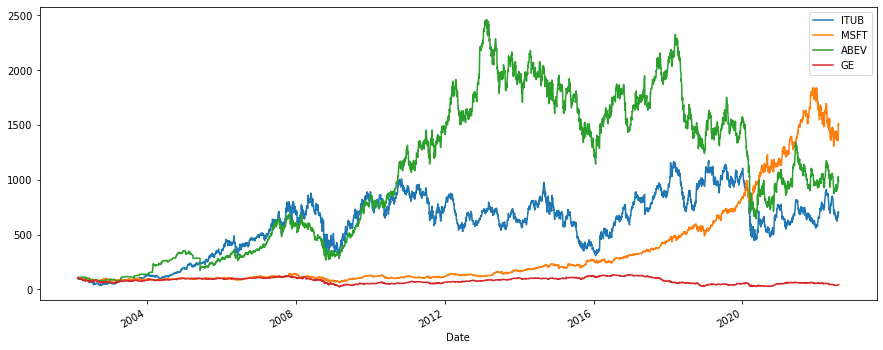

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15,6));



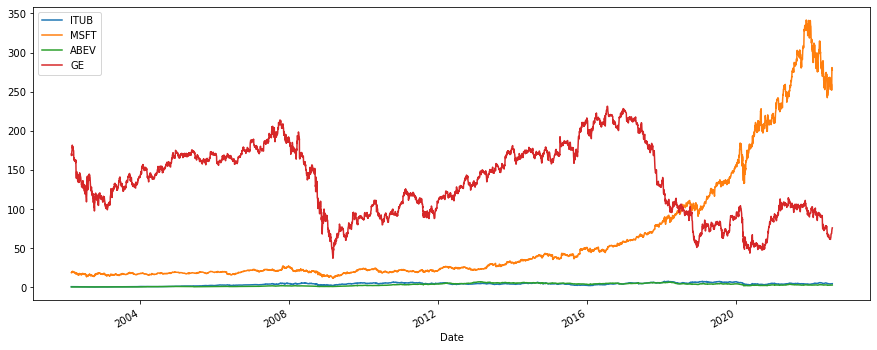

In [8]:
mydata.plot(figsize=(15,6));


In [9]:
#Exibindo o resultado de uma dia especifico.


mydata.loc['2004-03-10']

ITUB      0.782541
MSFT     16.087463
ABEV      0.639929
GE      143.472992
Name: 2004-03-10 00:00:00, dtype: float64

CALCULANDO O RETORNO DE UM PORTIFOLIO E COMPARANDO COM OUTRO A TAXA DE RETORNO.

In [10]:
#Matriz numpy. Calculando retorno simples para os ativo acima, com definição de 1 dia
retorno = (mydata / mydata.shift(1)) - 1
retorno.head()

,ITUB,MSFT,ABEV,GE
Date,,,,
2002-02-25,NaN,NaN,NaN,NaN
2002-02-26,0.032431,-0.008971,0.0,-0.011480
2002-02-27,-0.001148,-0.002733,0.0,0.004667
2002-02-28,-0.012644,-0.000856,0.0,-0.006452
2002-03-01,-0.022119,0.051937,0.0,0.024675


In [11]:
#Definindo um variavel, parar 
#Creating an array of weights for the portfolio.
peso_carteira = np.array([0.25,0.25,0.25,0.25])

In [12]:
#O resultado em questão foi uma matriz inteira, ou seja mutiplicou cada valor da tabela por retorno e peso definido. 
#Calculating the return of the portfolio.
np.dot(retorno,peso_carteira)

array([        nan,  0.00299508,  0.00019648, ...,  0.02375733,
       -0.00194959, -0.00102634])

In [13]:
#Calculo do retorno anual multiplicado pelo média de dias do ano em que teve pregão. Ou seja dias uteis.
#Calculating the annual return of the portfolio.
retorno_anual = retorno.mean() * 250
retorno_anual

ITUB    0.200286
MSFT    0.170311
ABEV    0.180061
GE      0.014772
dtype: float64

In [14]:
np.dot(retorno_anual,peso_carteira)

0.14135746227111

In [15]:
#Calculando o retorno da carteira, transformando o resultado em string, diminuindo as casas decimais e inclusão de porcentagem.
#Ou seja, resultado final da carteira.
#Calculating the return of the portfolio.
pfolio_01 = (str(round(np.dot(retorno_anual,peso_carteira),5)*100) + ' %')
print (pfolio_01)

14.136000000000001 %


In [16]:
#Criando uma nova carteira e definindo novos pesos para cada ativo.
#Creating an array with the weights of the portfolio.
peso_carteira_2 = np.array([0.4,0.4,0.15,0.05])

In [17]:
#Transformando o resultado e comparado uma carteira com outra.
pfolio_2 = (str(round(np.dot(retorno_anual,peso_carteira_2),5)*100)+ ' %')
print (pfolio_01)
print (pfolio_2)

14.136000000000001 %
17.599 %
